# Hotel Booking Cancellation Optimization

## Business Problem:
### In recent years, City Hotel and Resort Hotel have seen high cancellation rates. Each hotel is now dealing with a number of issues as a result, including fewer revenues and less than ideal hotel room use. Consequently, lowering cancellation rates is both hotels' primary goal in order to increase their efficiency in generating revenue, and for us to offer thorough business advice to address this problem.
### The analysis of hotel booking cancellations as well as other factors that have no bearing on their business and yearly revenue generation are the main topics of this report.

## Assumptions:
### 1. No unusual occurrences between 2015 and 2017 will have a substantial impact on the data used.
### 2. The information is still current and can be used to analyze a hotel's possible plans in an efficient manner.
### 3. There are no unanticipated negatives to the hotel employing any advised technique.
### 4. The hotels are not currently using any of the suggested solutions.
### 5. The biggest factor affecting the effectiveness of earning income is booking cancellations.
### 6. Cancellations result in vacant rooms for the booked length of time.
### 7. Clients make hotel reservations the same year they make cancellations.

## Research Question:
### 1. What are the variables that affect hotel reservation cancellations?
### 2. How can we make hotel reservations cancellations better?
### 3. How will hotels be assisted in making pricing and promotional decisions?

## Hypothesis:
### 1. More cancellations occur when prices are higher.
### 2. When there is a longer waiting list, customers tend to cancel more frequently.
### 3. The majority of clients are coming from offline travel agents to make their reservations.

## Importing Libraries

In [291]:
import numpy as np                        # to perform numerical operations 
import pandas as pd                       # for the dataframe/datasets
import matplotlib.pyplot as plt           # for data visualization
import seaborn as sns                     # for data visualization
import warnings as wn                     # to ignore the warnings
wn.filterwarnings("ignore")

## Loading the Dataset

In [292]:
df = pd.read_csv("D:\Excel Syllabus\Hotel Booking Cancellation Optimization.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,Not Canceled,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-2015
1,Resort Hotel,Not Canceled,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-2015
2,Resort Hotel,Not Canceled,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02-07-2015
3,Resort Hotel,Not Canceled,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02-07-2015
4,Resort Hotel,Not Canceled,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,Not Canceled,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-2017
119386,City Hotel,Not Canceled,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-2017
119387,City Hotel,Not Canceled,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-2017
119388,City Hotel,Not Canceled,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-2017


## Exploratory Data Analysis and Data Cleaning

In [293]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,Not Canceled,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,Not Canceled,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,Not Canceled,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,Not Canceled,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,Not Canceled,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [294]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,Not Canceled,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-2017
119386,City Hotel,Not Canceled,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-2017
119387,City Hotel,Not Canceled,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-2017
119388,City Hotel,Not Canceled,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-2017
119389,City Hotel,Not Canceled,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,07-09-2017


In [295]:
df.shape

(119390, 32)

In [296]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [298]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"],dayfirst=True)

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  object        
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [300]:
df.describe(include="object")

,hotel,is_canceled,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,Not Canceled,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,75166,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [301]:
for col in df.describe(include="object").columns:
    print(col)
    print(df[col].unique())
    print("="*80)

hotel
['Resort Hotel' 'City Hotel']
is_canceled
['Not Canceled' 'Canceled']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC'

In [302]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [303]:
df.drop(["agent","company"],axis=1,inplace=True)
df.dropna(inplace=True)

In [304]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [305]:
df.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


<Axes: >

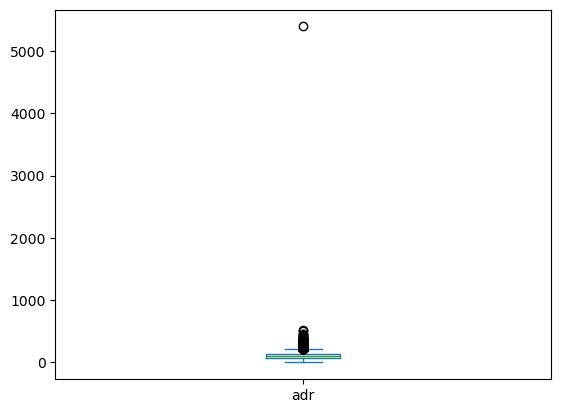

In [306]:
df["adr"].plot(kind="box")

In [307]:
df = df[df["adr"]<5000]

In [308]:
df.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-30 07:39:51.289939968
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


## Data Analysis and Visualization

In [309]:
cancelled_count = df["is_canceled"].value_counts()
print(cancelled_count)
cancelled_perc = df["is_canceled"].value_counts(normalize=True)
print(cancelled_perc)

is_canceled
Not Canceled    74745
Canceled        44152
Name: count, dtype: int64
is_canceled
Not Canceled    0.628653
Canceled        0.371347
Name: proportion, dtype: float64


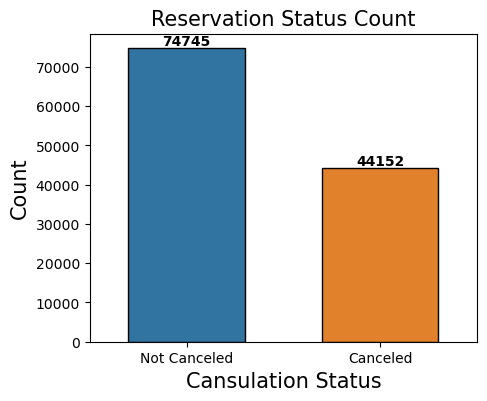

In [339]:
plt.figure(figsize=(5,4))
a = sns.countplot(x="is_canceled",data=df,edgecolor="k",width=0.6)
plt.title("Reservation Status Count",fontsize=15)
plt.xlabel("Cansulation Status",fontsize=15)
plt.ylabel("Count",fontsize=15)
for bars in a.containers:
    a.bar_label(bars,fontsize=10,weight="bold")
plt.show()

### The bar graph above shows the percentage of reservations that are canceled and those that are not. It is obvious that there are still a significant number of reservations that have not been canceled. There are still 37% of clients who canceled their reservation, which has a significant impact on the hotels' earnings.

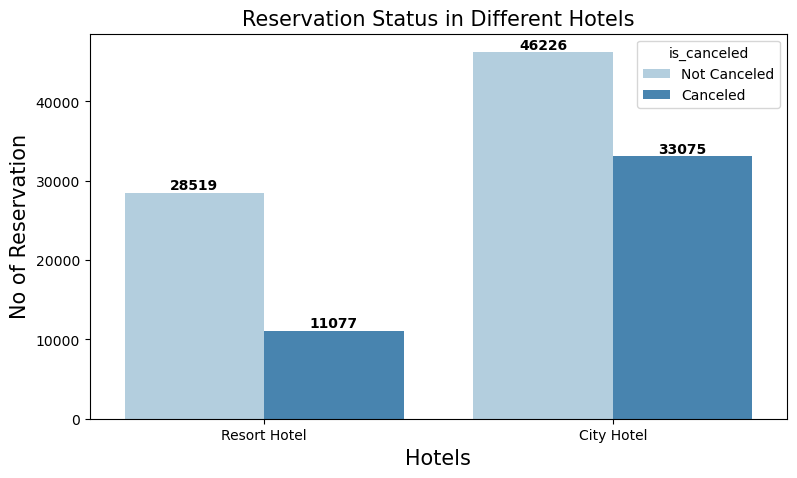

In [343]:
plt.figure(figsize=(9,5))
b = sns.countplot(x="hotel",hue="is_canceled",data=df,palette="Blues")
plt.title("Reservation Status in Different Hotels",fontsize=15)
plt.xlabel("Hotels",fontsize=15)
plt.ylabel("No of Reservation",fontsize=15)
for bars in b.containers:
    b.bar_label(bars,fontsize=10,weight="bold")
plt.show()

### The bar graph above shows that, city hotels have more bookings compared to resort hotels. This difference in booking volume is likely due to resort hotels being more expensive than city hotels.

In [354]:
resort_hotel = df[df["hotel"] == "Resort Hotel"]
resort_hotel["is_canceled"].value_counts(normalize=1)

is_canceled
Not Canceled    0.72025
Canceled        0.27975
Name: proportion, dtype: float64

In [355]:
city_hotel = df[df["hotel"] == "City Hotel"]
city_hotel["is_canceled"].value_counts(normalize=1)

is_canceled
Not Canceled    0.582918
Canceled        0.417082
Name: proportion, dtype: float64

In [358]:
resort_hotel = resort_hotel.groupby("reservation_status_date")[["adr"]].mean()
city_hotel = city_hotel.groupby("reservation_status_date")[["adr"]].mean()

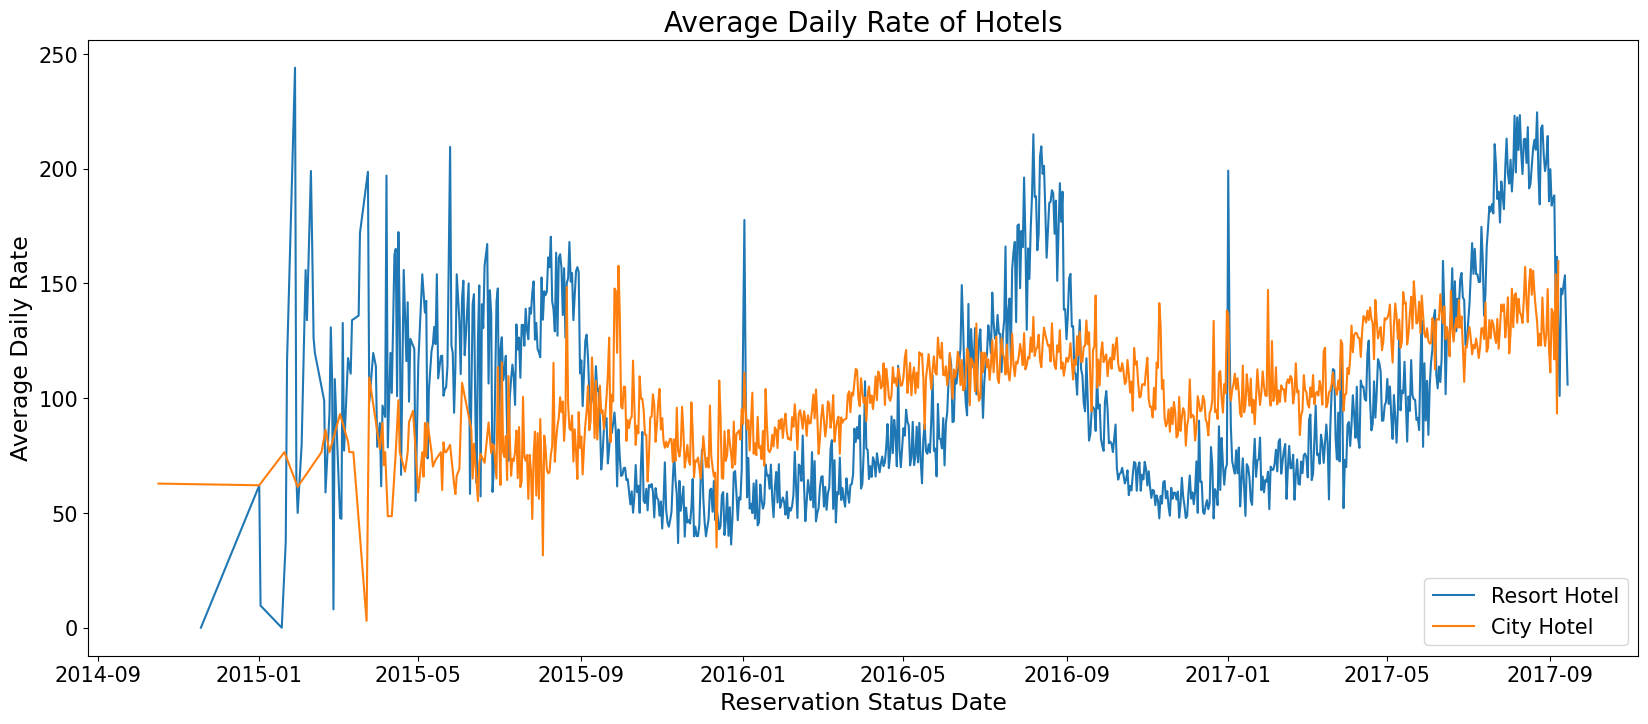

In [510]:
plt.figure(figsize=(20,8))
plt.plot(resort_hotel.index,resort_hotel["adr"],label="Resort Hotel")
plt.plot(city_hotel.index,city_hotel["adr"],label="City Hotel")
plt.title("Average Daily Rate of Hotels",fontsize=20)
plt.xlabel("Reservation Status Date",fontsize = 17)
plt.ylabel("Average Daily Rate",fontsize = 17)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

### The line graph above shows that, on certain days, the average daily rate for a city hotel is less than that of a resort hotel, and on other days, it is even less. It goes without saying that weekends and holidays may see a rise in resort hotel rates.

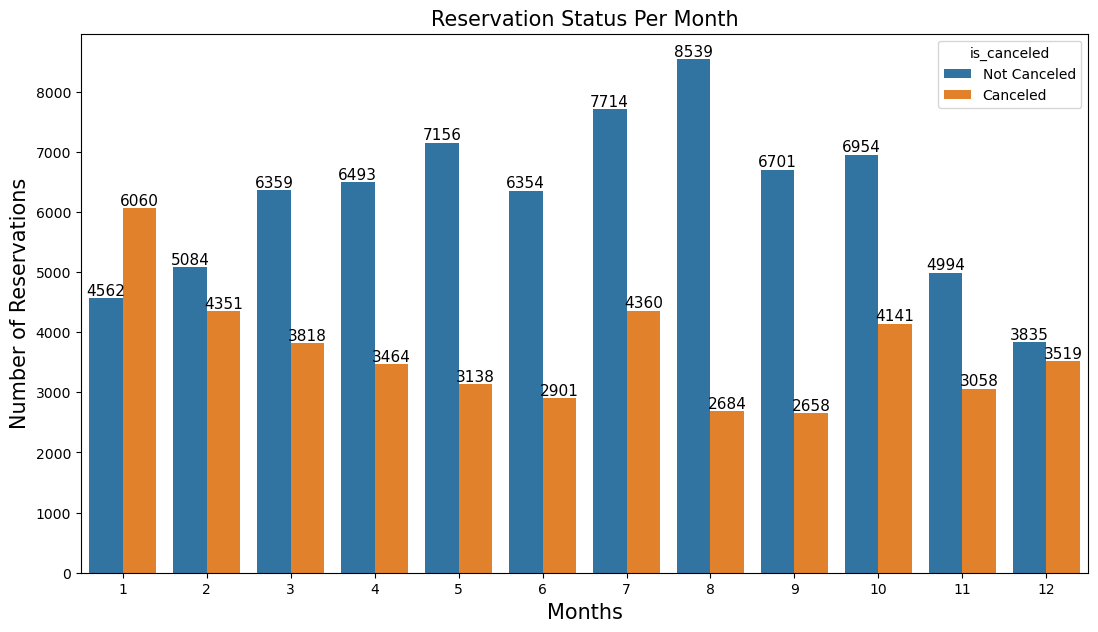

In [430]:
plt.figure(figsize=(13,7))
df["month"] = df["reservation_status_date"].dt.month
d = sns.countplot(x="month",hue="is_canceled",data=df)
plt.title("Reservation Status Per Month",fontsize=15)
plt.xlabel("Months",fontsize=15)
plt.ylabel("Number of Reservations",fontsize=15)
for bars in d.containers:
    d.bar_label(bars,fontsize=11)
plt.show()

### In the graph above, we created a grouped bar chart to analyze the months with the highest and lowest reservation levels based on reservation status. As shown, the month of August has the highest number of confirmed reservations, while the month of January has the most canceled reservations.

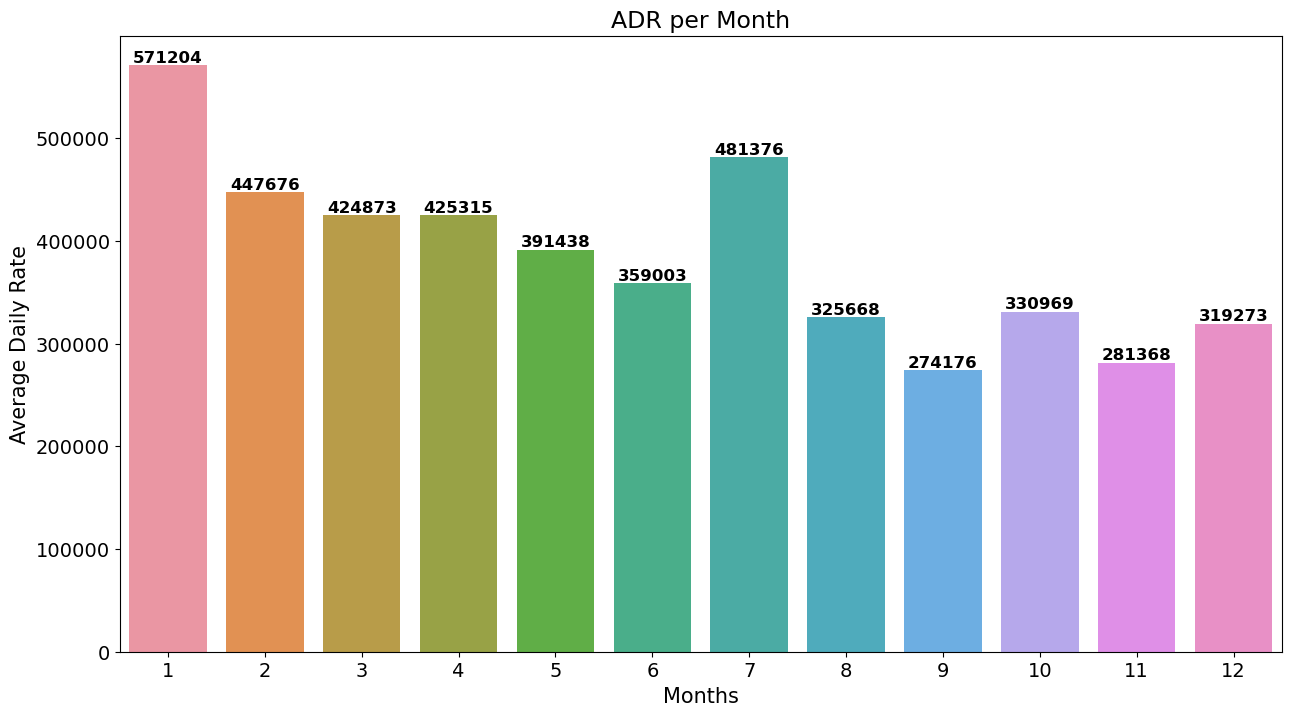

In [511]:
plt.figure(figsize = (15,8)) 
t = sns.barplot(x='month', y='adr', data= df[df['is_canceled'] == "Canceled"].groupby("month")[['adr']].sum().reset_index())
plt.title('ADR per Month', fontsize = 17)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Average Daily Rate', fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
for bars in t.containers:
    t.bar_label(bars,fontsize=12,weight="bold")
plt.show()

### The bar graph above shows that cancellations are most common when prices are highest and least common when prices are lowest, indicating that the cost of accommodation is the primary factor driving cancellations.

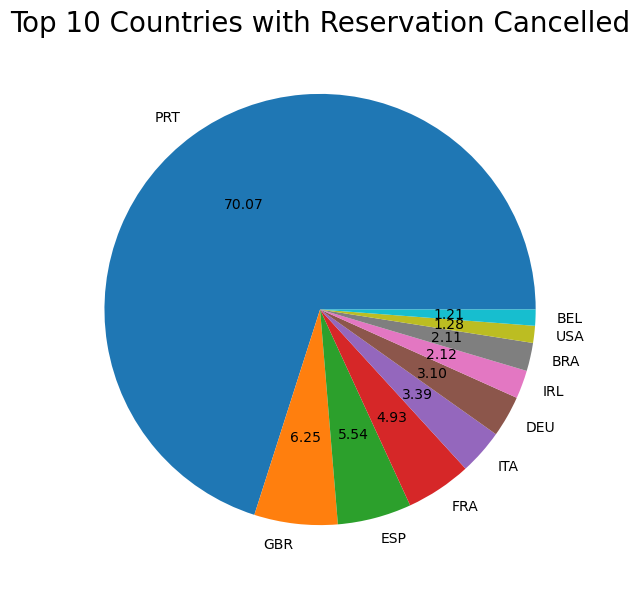

In [507]:
cancelled_data = df[df["is_canceled"] == "Canceled"]
top_10_country = cancelled_data["country"].value_counts().head(10)
plt.figure(figsize=(8,7))
plt.pie(top_10_country,autopct="%.2f",labels=top_10_country.index)
plt.title('Top 10 Countries with Reservation Cancelled', fontsize = 20)
plt.show()

### Now, let's examine which country has the highest reservation cancellations. The pie chart above shows that Portugal ranks at the top with the highest number of cancellations.

In [464]:
df.value_counts("market_segment")

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [465]:
df["market_segment"].value_counts(normalize=True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

### Let's examine the sources from which guests are making hotel reservations. Are they coming from Direct or Groups, Online or Offline Travel Agencies? Around 47% of clients come from online travel agencies, while about 20% come from offline travel agencies. Additionally, around 17% come from groups, and only about 10% of clients book hotels directly.

In [474]:
cancelled_data = df[df["is_canceled"] == "Canceled"]
not_cancelled_data = df[df["is_canceled"] == "Not Canceled"]

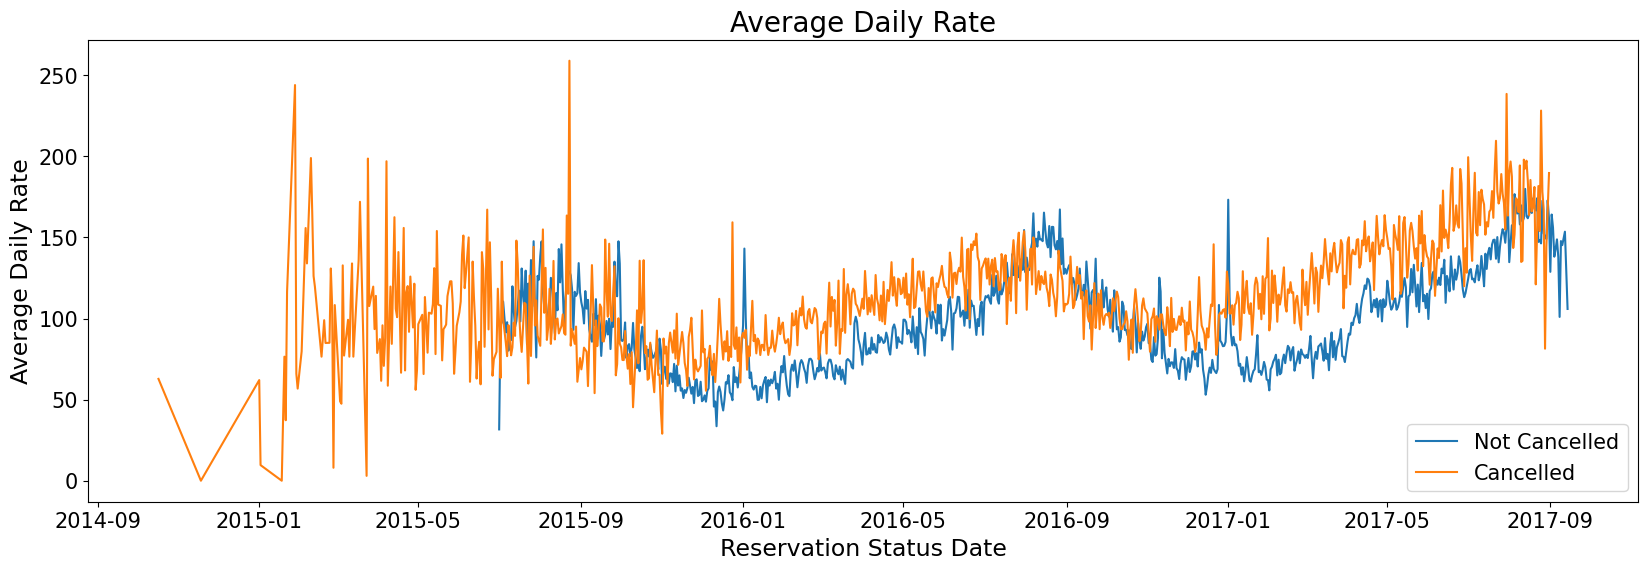

In [503]:
cancelled_of_adr = cancelled_data.groupby("reservation_status_date")[["adr"]].mean() 
cancelled_of_adr.reset_index(inplace = True)
cancelled_of_adr.sort_values("reservation_status_date", inplace = True)

not_cancelled_of_adr = not_cancelled_data.groupby("reservation_status_date")[["adr"]].mean()
not_cancelled_of_adr.reset_index(inplace = True)
not_cancelled_of_adr.sort_values("reservation_status_date", inplace = True)

plt.figure(figsize=(20,6))
plt.plot(not_cancelled_of_adr["reservation_status_date"], not_cancelled_of_adr["adr"], label = "Not Cancelled")
plt.plot(cancelled_of_adr["reservation_status_date"], cancelled_of_adr["adr"], label = "Cancelled")
plt.title("Average Daily Rate",fontsize = 20)
plt.xlabel("Reservation Status Date",fontsize = 17)
plt.ylabel("Average Daily Rate",fontsize = 17)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [504]:
cancelled_of_adr = cancelled_of_adr[(cancelled_of_adr["reservation_status_date"]>"2016") & (cancelled_of_adr["reservation_status_date"]<"2017-09")]
not_cancelled_of_adr = not_cancelled_of_adr[(not_cancelled_of_adr["reservation_status_date"]>"2016") & (not_cancelled_of_adr["reservation_status_date"]<"2017-09")]

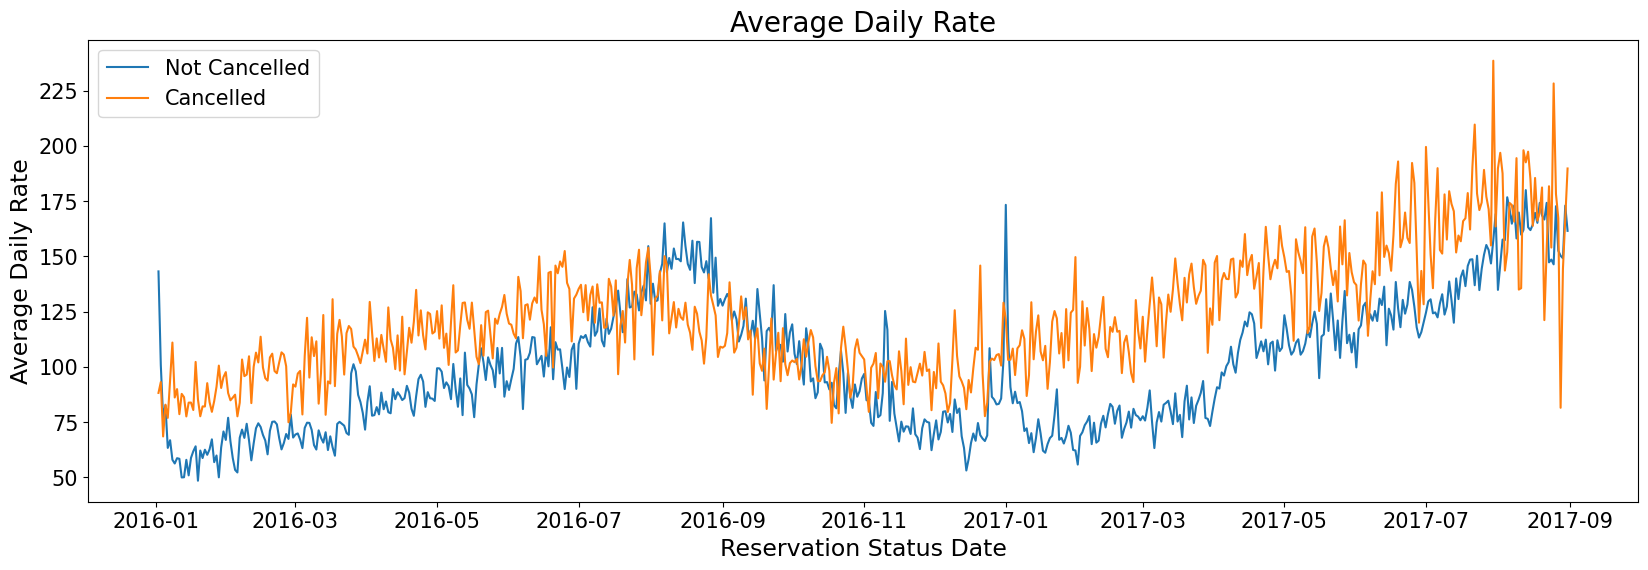

In [505]:
plt.figure(figsize=(20,6))
plt.title("Average Daily Rate") 
plt.plot(not_cancelled_of_adr["reservation_status_date"], not_cancelled_of_adr["adr"], label = "Not Cancelled")
plt.plot(cancelled_of_adr["reservation_status_date"], cancelled_of_adr["adr"], label = "Cancelled")
plt.title("Average Daily Rate",fontsize = 20)
plt.xlabel("Reservation Status Date",fontsize = 17)
plt.ylabel("Average Daily Rate",fontsize = 17)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

### As seen in the graph, reservations are canceled when the average daily rate is higher than when it is not canceled. It clearly proves all the above analysis, that the higher price leads to higher cancellation.

## Suggestions:
### 1. Cancellation rates rise as the price does. In order to prevent cancellations of reservations, hotels could work on their pricing strategies and try to lower the rates for specific hotels based on locations. They can also provide some discounts to the consumers.
### 2. As the ratio of the cancellation and not cancellation of the resort hotel is higher in the resort hotel than the city hotels. So the hotels should provide a reasonable discount on the room prices on weekends or on holidays.
### 3. In the month of January, hotels can start campaigns or marketing with a reasonable amount to increase their revenue as the cancellation is the highest in this month.
### 4. They can also increase the quality of their hotels and their services mainly in Portugal to reduce the cancellation rate.